In [1]:
import json
import os
import matplotlib.pyplot as plt
import matplotlib as mlb
mlb.rcParams['figure.dpi'] = 100
json_files_path = r'E:\SJ\cricket\analysis\IPL\json'



In [2]:
def process_season(season):
    if '/' in str(season):
        t = {'2020/21': 2020, '2007/08': 2008, '2009/10': 2010}
        return t[season]
    else:
        return int(season)


In [3]:
# Process Data from all the json files
pos_dict = {p: 0 for p in range(1, 12)}
n = 0

for file in os.listdir(json_files_path):
    with open(json_files_path+'/'+file) as f:
        match = json.loads(f.read())
        season = process_season(match['info']['season'])
        # teams = set(match['info']['teams'])
        for inn in match['innings']:
            n += 1
            pos = {p: 0 for p in range(1, 12)}
            batters = {}
            position = 1
            total = 0
            for over in inn['overs']:
                for delivery in over['deliveries']:
                    total += delivery['runs']['total']
                    batter = delivery['batter']
                    non_striker = delivery['non_striker']
                    if batter not in batters:
                        batters[batter] = position
                        position += 1

                    if non_striker not in batters:
                        batters[non_striker] = position
                        position += 1

                    pos[batters[batter]] += delivery['runs']['batter']
                    
            for position in pos:
                pos_dict[position] += pos[position]/total

for pos in pos_dict:
    pos_dict[pos] = pos_dict[pos]/n

print(n)


            


1928


In [13]:
pos_dict

{1: 18.048146119355142,
 2: 18.11459924391931,
 3: 15.904680322053338,
 4: 13.802715881186902,
 5: 11.219246287095567,
 6: 7.707112572866855,
 7: 5.044344483416276,
 8: 2.666303070605849,
 9: 1.3143723037268642,
 10: 0.6516933443023836,
 11: 0.2222608759165947}

In [16]:
pos = list(zip(*list(pos_dict.items())))[0]
pos_vals = list(zip(*list(pos_dict.items())))[1]

C:\Users\Saksham\AppData\Local\Temp/ipykernel_5168/3416452897.py:1: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(pos_vals, labels=pos, autopct='%1.2f%%')


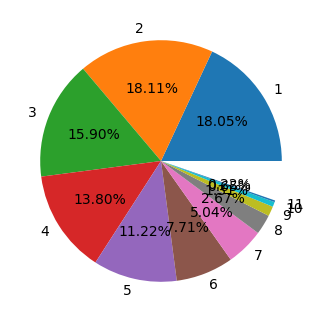

In [17]:
plt.pie(pos_vals, labels=pos, autopct='%1.2f%%')
plt.show()
